In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
%matplotlib inline

In [2]:
astropy.__version__

'5.3.4'

In [3]:
#astroplan.download_IERS_A()
#astropy.utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
astroplan.download_IERS_A()

In [4]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [5]:
observer = astroplan.Observer.at_site('keck')

In [6]:
#10:19 - 15:01
today = Time('2023-12-11 09:00:00', scale='utc')#10:24 - 15:20

In [7]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)



handoff = Time('2023-12-11 10:08:00', scale='utc')

12 deg env twilight 2023-12-11 04:34:52.098
15 deg env twilight 2023-12-11 04:48:26.485
18 deg eve twilight 2023-12-11 05:01:56.092
18 deg morn twilight 2023-12-11 15:28:03.841
15 deg morn twilight 2023-12-11 15:41:34.094
12 deg morn twilight 2023-12-11 15:55:08.325


In [8]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)03:55:21.7','+09:47:18

#HZ4           = astroplan.FixedTarget(coord=SkyCoord('',unit=(u.hourangle, u.degree)),
#                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 
LTT6248    = astroplan.FixedTarget(coord=SkyCoord('15:38:59.8', '-28:35:34', unit=(u.hourangle, u.degree)),
                                      name='LTT6248')#V~11.797


In [9]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66,PG0205134, Feige11, Hiltner600, LTT9239,LTT1020,LTT6248]

### Choose Standards for the night

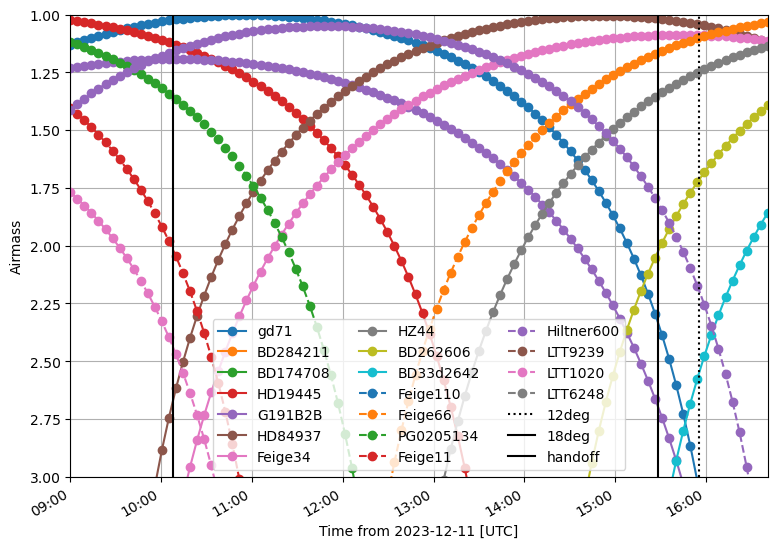

In [10]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure(figsize=(9,6))
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [11]:
chosen_stds = [Hiltner600, Feige34]


In [49]:
sn2019uo    = astroplan.FixedTarget(coord=SkyCoord('12:02:36.56', '+41:03:42.3', unit=(u.hourangle, u.degree)),
                                  name='2019uo')
sn2017ivh    = astroplan.FixedTarget(coord=SkyCoord('13:39:36.25', '-11:28:55.9', unit=(u.hourangle, u.degree)),
                                  name='2017ivh')
sn2017eaw    = astroplan.FixedTarget(coord=SkyCoord('20:34:44.24', '+60:11:35.9', unit=(u.hourangle, u.degree)),
                                  name='2017eaw')
sn2017ivv    = astroplan.FixedTarget(coord=SkyCoord('20:28:49.84', '-04:22:57.3', unit=(u.hourangle, u.degree)),
                                  name='2017ivv')
sn2018gj    = astroplan.FixedTarget(coord=SkyCoord('16:32:02.40', '+78:12:41.1', unit=(u.hourangle, u.degree)),
                                  name='2018gj')
sn2018aoq    = astroplan.FixedTarget(coord=SkyCoord('12:10:38.19', '+39:23:47.0', unit=(u.hourangle, u.degree)),
                                  name='2018aoq')
sn2018las    = astroplan.FixedTarget(coord=SkyCoord('10:59:52.23', '+19:47:41.8', unit=(u.hourangle, u.degree)),
                                  name='2018las')
sn2018aoz  = astroplan.FixedTarget(coord=SkyCoord('11:51:01.79', '-28:44:38.4', unit=(u.hourangle, u.degree)),
                                   name='2018aoz')
sn2018bsz = astroplan.FixedTarget(coord=SkyCoord('16:09:39.20', '-32:03:45.2', unit=(u.hourangle, u.degree)),
                                   name='2018bsz')
sn2018hmx = astroplan.FixedTarget(coord=SkyCoord('08:33:39.34', '+55:35:53.0', unit=(u.hourangle, u.degree)),
                                   name='2018hmx')
sn2018hna = astroplan.FixedTarget(coord=SkyCoord('12:26:12.05', '+58:18:51.1', unit=(u.hourangle, u.degree)),
                                   name='2018hna')
sn2018bwr = astroplan.FixedTarget(coord=SkyCoord('15:28:26.17', '+08:48:22.2', unit=(u.hourangle, u.degree)),
                                   name='2018bwr')
sn2017cjb = astroplan.FixedTarget(coord=SkyCoord('12:53:50.45', '+09:42:17.7', unit=(u.hourangle, u.degree)),
                                   name='2017cjb')
sn2017gmr = astroplan.FixedTarget(coord=SkyCoord('02:35:30.15', '-09:21:15.0', unit=(u.hourangle, u.degree)),
                                   name='2017gmr')
sn2018hhn = astroplan.FixedTarget(coord=SkyCoord('22:52:32.06', '+11:40:26.7', unit=(u.hourangle, u.degree)),
                                   name='2018hhn')
sn2018giu = astroplan.FixedTarget(coord=SkyCoord('20:27:49.22', '+09:54:51.9', unit=(u.hourangle, u.degree)),
                                   name='2018giu')
sn2018eog = astroplan.FixedTarget(coord=SkyCoord('20:28:12.03', '-03:08:11.2', unit=(u.hourangle, u.degree)),
                                   name='2018eog')
sn2019cxu = astroplan.FixedTarget(coord=SkyCoord('13:05:30.09', '-08:45:52.7', unit=(u.hourangle, u.degree)),
                                   name='2019cxu')
sn2020jfv = astroplan.FixedTarget(coord=SkyCoord('23:06:35.75', '+00:36:43.6', unit=(u.hourangle, u.degree)),
                                   name='2020jfv')
sn2021aatd = astroplan.FixedTarget(coord=SkyCoord('00:59:04.17', '-00:12:12.2', unit=(u.hourangle, u.degree)),
                                   name='2021aatd')

sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                   name='2022crv')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2022ewj = astroplan.FixedTarget(coord=SkyCoord('10:46:34.61', '+13:45:16.9', unit=(u.hourangle, u.degree)),
                                   name='2022ewj')
sn2022mma = astroplan.FixedTarget(coord=SkyCoord('14:39:01.50', '+15:59:11.8', unit=(u.hourangle, u.degree)),
                                   name='2022mma')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                   name='2022abq')
sn2022frq = astroplan.FixedTarget(coord=SkyCoord('13:27:56.91', '-13:24:59.2', unit=(u.hourangle, u.degree)),
                                   name='2022frq')
sn2022kad = astroplan.FixedTarget(coord=SkyCoord('14:58:43.32', '+11:37:50.9', unit=(u.hourangle, u.degree)),
                                   name='2022kad')
sn2022fuc = astroplan.FixedTarget(coord=SkyCoord('12:34:34.25', '+63:31:06.4', unit=(u.hourangle, u.degree)),
                                   name='2022fuc')
sn2023bee = astroplan.FixedTarget(coord=SkyCoord('08:56:11.63', '-03:19:32.0', unit=(u.hourangle, u.degree)),
                                   name='2023bee')
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                   name='2021yja')

sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                   name='2022xkq') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu') 
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
sn2021qqu = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu')
sn2023ehl = astroplan.FixedTarget(coord=SkyCoord('20:25:10.75', '+05:15:24.3', unit=(u.hourangle, u.degree)),
                                   name='2023ehl')

sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6',  unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023dbc = astroplan.FixedTarget(coord=SkyCoord('11:11:39.21', '+55:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023dbc')
sn2023dtc = astroplan.FixedTarget(coord=SkyCoord('08:33:17.54', '-22:57:45.0', unit=(u.hourangle, u.degree)),
                                   name='2023dtc')

sn2023esp = astroplan.FixedTarget(coord=SkyCoord('06:46:53.85', '+15:35:54.2', unit=(u.hourangle, u.degree)),
                                   name='2023esp')
sn2022aagp = astroplan.FixedTarget(coord=SkyCoord('09:10:41.91' '+07:12:20.4', unit=(u.hourangle, u.degree)),
                                   name='2022aagp')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                   name='2022erq')
sn2023qea = astroplan.FixedTarget(coord=SkyCoord('18:09:04.97', '+42:34:21.7', unit=(u.hourangle, u.degree)),
                                   name='2022qea')
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa')
at2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5', unit=(u.hourangle, u.degree)),
                                   name='2023mut')
sn2023rau = astroplan.FixedTarget(coord=SkyCoord('00:20:55.24', '-01:45:28.5', unit=(u.hourangle, u.degree)),
                                   name='2023rau')
sn2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023qov = astroplan.FixedTarget(coord=SkyCoord('21:12:02.04', '-49:15:18.1', unit=(u.hourangle, u.degree)),
                                   name='2023qov')
sn2023ubp = astroplan.FixedTarget(coord=SkyCoord('23:10:31.07', '+02:57:15.6', unit=(u.hourangle, u.degree)),
                                   name='2023ubp')
sn2023tsz = astroplan.FixedTarget(coord=SkyCoord('08:37:29.53', '-00:02:35.7', unit=(u.hourangle, u.degree)),
                                   name='2023tsz')
sn2023nlk = astroplan.FixedTarget(coord=SkyCoord('17:20:53.29', '+22:12:35.3', unit=(u.hourangle, u.degree)),
                                   name='2023nlk')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                   name='2022acko')
sn2023ngy = astroplan.FixedTarget(coord=SkyCoord('22:18:30.18', '+29:14:41.1', unit=(u.hourangle, u.degree)),
                                   name='2023ngy')
sn2023wed = astroplan.FixedTarget(coord=SkyCoord('07:24:15.50', '+19:04:52.7', unit=(u.hourangle, u.degree)),
                                   name='2023wed')
sn2022ablq = astroplan.FixedTarget(coord=SkyCoord('12:13:06.48', '+17:05:56.2', unit=(u.hourangle, u.degree)),
                                   name='2022ablq')
sn2022xxf = astroplan.FixedTarget(coord=SkyCoord('11:30:05.89', '+09:16:57.3', unit=(u.hourangle, u.degree)),
                                   name='2022xxf')
sn2023plg = astroplan.FixedTarget(coord=SkyCoord('07:17:03.16', '+24:57:31.7', unit=(u.hourangle, u.degree)),
                                   name='2023plg')
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2023xje = astroplan.FixedTarget(coord=SkyCoord('05:38:52.978', '-35:55:17.07', unit=(u.hourangle, u.degree)),
                                   name='2023xje')
sn2023ixf = astroplan.FixedTarget(coord=SkyCoord('14:03:38.56', '+54:18:42.0', unit=(u.hourangle, u.degree)),
                                   name='2023ixf')
sn2023fyq = astroplan.FixedTarget(coord=SkyCoord('12:25:45.87', '+12:39:48.7', unit=(u.hourangle, u.degree)),
                                   name='2023fyq')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023xgo= astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023wdd= astroplan.FixedTarget(coord=SkyCoord('01:18:11.05', '+38:26:32.7', unit=(u.hourangle, u.degree)),
                                   name='2023wdd')
sn2023zcu= astroplan.FixedTarget(coord=SkyCoord('06:01:06.84', '-23:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023zcu')

In [50]:
targets = [sn2023rau, sn2023plg, sn2023fyq, sn2023ixf, sn2023tsz, sn2022jox, sn2022ablq, sn2021ahpl, sn2022xus, sn2023cr, sn2023wdd, sn2023zcu]#sn2022xkq, sn2023esp, sn2023plg, sn2023ufx, sn2023tsz, sn2023bee, sn2022xus, sn2022xxf]

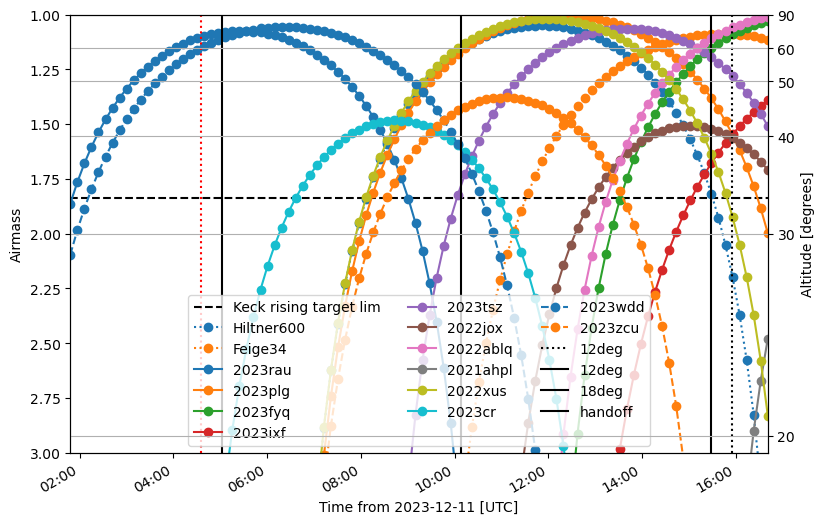

In [51]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
time = today+np.linspace(-0.3, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [15]:
sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 

sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)

sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                   name='2021yja')

sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                   name='2022xkq') 

sn2017gmr = astroplan.FixedTarget(coord=SkyCoord('02:35:30.15', '-09:21:15.0', unit=(u.hourangle, u.degree)),
                                   name='2027gmr')

sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                   name='2022erq')

sn2022esa= astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa')

In [71]:
tab = """Hiltner600  06:45:13.33 +02:08:14.1 10.4 1x30
2023wdd     01:18:11.05 +38:26:32.7 19   2x500
2023cr      03:42:13.07 -27:52:16.6 20   2x600
2023zcu     06:01:06.84 -23:40:29.2 16   1x100
2023xgo     05:04:19.19 +67:37:21.1 19   2x600
2023plg     07:17:03.16 +24:57:31.7 17.5 1x250
2022xus     06:54:05.13 +08:34:13.5 22   3x900
2023tsz     08:37:29.53 -00:02:35.7 21.0 2x900
2022jox     09:57:44.49 -28:30:56.5 23.0 5x900
2023fyq     12:25:45.87 +12:39:48.7 19.5 2x600
2023ixf     14:03:38.56 +54:18:42.0 15.0 1x150
Feige34     10:39:36.74 +43:06:09.3 11.1 1x60
end     00:00:00     -90:00:00.  99 1x1 """
#2022ablq    12:13:06.48 +17:05:56.2 20   1x900
#2023bee     08:56:11.63 -03:19:32.0 20.5 2x900
#2023axu     06:45:55.32 -18:13:53.5 18.0 1x300
#2022wed     07:24:15.50 +19:04:52.7 19.5 2x350
#2023dtc     08:33:17.54 -22:57:45.0 20.0 2x450
#2023dbc     11:11:39.21 +55:40:29.2 21.0 2x600
#2023mut     04:48:34.34 +00:14:47.5 16.0 1x150
#2022qzr 00:09:55.01  -05:01:16.1 22 2x1200
#2022aaiq 14:26:32.03  +56:35:03.2 21 1x1200
#BD33d2642 15:51:59.86  +32:56:54.8 10.81 1x30
#2023ktw 17:27:29.91  +34:17:53.03 18.5 2x600
#2022yjl 22:17:58.32  +10:59:43.1 22 2x1200
#2022wsp 23:00:03.56  +15:58:43.9 19 3x1200
#2022qzr 00:09:55.01  -05:01:16.1 22 3x1200
#2023cpt 15:21:33.36  -13:05:21.7  19.5 1x600
#2021ahpl 15:15:57.94  -19:17:32.0 21 2x1200
#2023cpt 15:21:33.36  -13:05:21.7  19.5 1x600
#MIRA 00:00:00 -89:00:00 99 1x300
#2022esa 16:53:57.60  -09:42:10.1 19 2x600
#2022mma 14:39:01.50  +15:59:11.8 18-19 1x600
#2022frq 13:27:56.91  -13:24:59.2 21-22 2x1200
#2022abq 13:22:56.79  +28:19:09.6 21-22 3x1200
#2022kad 14:58:43.32  +11:37:50.9 21-22 2x1200
#HD19445 03:08:25.86  +26:20:05.7 7.8 1x10
#HD84937 09:48:56.09  +13:44:39.3 8.3 1x10
#2020jgl 09:28:58.43  -14:48:19.8 19 1x600
#2019eez 06:16:22.26  -21:21:35.7 23 3x1200
#2020jfo 12:21:50.48  +04:28:54.1 18 1x300
#2020hvf 11:21:26.45  +03:00:52.8 17 1x150
#2020uxz 01:24:06.87  +12:55:17.3 15 1x100
#placehold 04:00:54.33  +18:00:10.2 19.5 1x900
#2020tkx 18:40:09.00  +34:06:59.5 19.5 1x900
#PG0205134  02:08:03.44  +13:36:30.9 14.87  1x120
#2020cxd 17:26:29.26  +71:05:38.6  20  1x900
#end       23:19:58.39  -05:09:55.8  11.83  1x1
#2020nxt  22:37:36.24  +35:00:07.7  21.2   1x1250
#placehold  00:00:00  00:00:00   22        2x1250
#2019iex  23:51:03.61  +20:08:43.7  21.3   1x1250
#gd71     05:52:27.51  +15:53:16.6  13.03  1x90
#HZ4      03:55:21.7   +09:47:18    14.52 1x120
#HD19445  03:08:25.86  +26:20:05.7  7.8   1x10
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019hnl 23:43:10.24  -02:56:58.7  23     4x1200
#2019muj  02:26:18.55  -09:50:09.0  22     2x1200
#2019osl  04:38:54.33  +18:50:10.2  22.5   3x1200


In [72]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [62]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
Hiltner600,06:45:13.33,+02:08:14.1,10.4,1x30,1.0,30.0
2023wdd,01:18:11.05,+38:26:32.7,19,2x550,2.0,550.0
2023cr,03:42:13.07,-27:52:16.6,20,2x600,2.0,600.0
2023xgo,05:04:19.19,+67:37:21.1,19,2x600,2.0,600.0
2023plg,07:17:03.16,+24:57:31.7,17.5,1x250,1.0,250.0
2023zcu,06:01:06.84,-23:40:29.2,16,1x100,1.0,100.0
2022xus,06:54:05.13,+08:34:13.5,22,3x900,3.0,900.0
2023tsz,08:37:29.53,-00:02:35.7,21.0,2x900,2.0,900.0
2022jox,09:57:44.49,-28:30:56.5,23.0,5x900,5.0,900.0


In [73]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    

In [74]:
tbdata['start'] = obs_start[:-1]

In [58]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
Hiltner600,06:45:13.33,+02:08:14.1,10.4,1x30,1.0,30.0,2023-12-11 10:08:00.000
2023wdd,01:18:11.05,+38:26:32.7,19,2x550,2.0,550.0,2023-12-11 10:13:30.000
2023zcu,06:01:06.84,-23:40:29.2,16,1x100,1.0,100.0,2023-12-11 10:40:05.000
2023cr,03:42:13.07,-27:52:16.6,20,2x600,2.0,600.0,2023-12-11 10:46:45.000
2023xgo,05:04:19.19,+67:37:21.1,19,2x600,2.0,600.0,2023-12-11 11:15:00.000
2023plg,07:17:03.16,+24:57:31.7,17.5,1x250,1.0,250.0,2023-12-11 11:43:15.000
2022xus,06:54:05.13,+08:34:13.5,22,3x900,3.0,900.0,2023-12-11 11:52:25.000
2023tsz,08:37:29.53,-00:02:35.7,21.0,2x900,2.0,900.0,2023-12-11 12:48:55.000
2022jox,09:57:44.49,-28:30:56.5,23.0,5x900,5.0,900.0,2023-12-11 13:27:10.000


In [22]:
15+1250*2/60.+(195)/60.

59.916666666666664

In [23]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

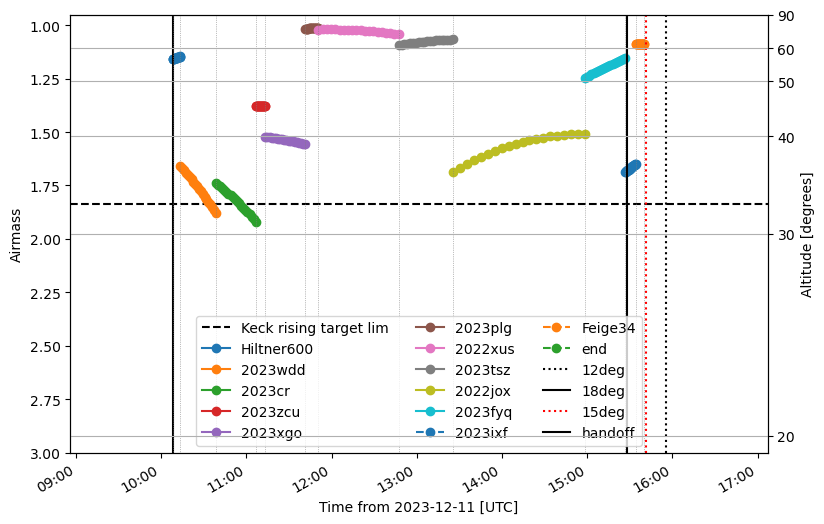

In [75]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='r', ls='--', label='Keck rising target lim (new)')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

In [25]:
handoff

<Time object: scale='utc' format='iso' value=2023-12-11 10:08:00.000>

# Backup

In [26]:
sn2020jgl = astroplan.FixedTarget(coord=SkyCoord('09:28:58.43', '-14:48:19.8', unit=(u.hourangle, u.degree)),
                                  name='2020jgl')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
sn2020tkx = astroplan.FixedTarget(coord=SkyCoord('18:40:09.00', '+34:06:59.5', unit=(u.hourangle, u.degree)),
                                  name='2020tkx')
sn2020jfo = astroplan.FixedTarget(coord=SkyCoord('12:21:50.48', '+04:28:54.1', unit=(u.hourangle, u.degree)),
                                  name='2020jfo')
sn2020hvf = astroplan.FixedTarget(coord=SkyCoord('11:21:26.45', '+03:00:52.8', unit=(u.hourangle, u.degree)),
                                  name='2020hvf')
sn2019xdf = astroplan.FixedTarget(coord=SkyCoord('09:27:51.81', '+68:24:42.4', unit=(u.hourangle, u.degree)),
                                  name='2019xdf')
sn2019eez = astroplan.FixedTarget(coord=SkyCoord('06:16:22.26', '-21:21:35.7', unit=(u.hourangle, u.degree)),
                                  name='2019eez')
sn2015bh = astroplan.FixedTarget(coord=SkyCoord('09:09:35.09', '+33:07:21.4', unit=(u.hourangle, u.degree)),
                                  name='2015bh')
sn2020qmj = astroplan.FixedTarget(coord=SkyCoord('00:44:06.01', '+05:15:35.9', unit=(u.hourangle, u.degree)),
                                  name='2020qmj')
sn2019ust = astroplan.FixedTarget(coord=SkyCoord('00:54:22.42', '+31:40:12.6', unit=(u.hourangle, u.degree)),
                                  name='2019ust')
sn2020vg = astroplan.FixedTarget(coord=SkyCoord('11:48:54.44', '-04:40:53.9', unit=(u.hourangle, u.degree)),
                                  name='2020vg')

In [27]:
tab = """MIRA 00:00:00 -89:00:00 99 1x600
2020qmj 00:44:06.01  +05:15:35.9 20 3x1200
G191B2B 05:05:30.60  +52:49:54.0 11.9 1x60
2019ust 00:54:22.42  +31:40:12.6 22 3x1200
2020udy 02:06:49.34  +44:35:15.3 18 2x300
2019xdf 09:27:51.81  +68:24:42.4 22 3x1200
Feige34 10:39:36.74  +43:06:09.3 11.3 1x60
2020jgl 09:28:58.43  -14:48:19.8 19 2x600
2020hvf 11:21:26.45  +03:00:52.8 17 2x150
2020vg  11:48:54.44  -04:40:53.9 20 2x900
2020jfo 12:21:50.48  +04:28:54.1 18 2x300
Feige34 10:39:36.74  +43:06:09.3 11.3 1x60
end     00:00:00     -90:00:00.  99 1x1 """
#2020uxz 01:24:06.87  +12:55:17.3 16 2x100
#HD19445 03:08:25.86  +26:20:05.7 7.8 1x10
#HD84937 09:48:56.09  +13:44:39.3 8.3 1x10
#2020jgl 09:28:58.43  -14:48:19.8 19 1x600
#2019eez 06:16:22.26  -21:21:35.7 23 3x1200
#2020jfo 12:21:50.48  +04:28:54.1 18 1x300
#2020hvf 11:21:26.45  +03:00:52.8 17 1x150
#2020uxz 01:24:06.87  +12:55:17.3 15 1x100
#placehold 04:00:54.33  +18:00:10.2 19.5 1x900
#2020tkx 18:40:09.00  +34:06:59.5 19.5 1x900
#PG0205134  02:08:03.44  +13:36:30.9 14.87  1x120
#2020cxd 17:26:29.26  +71:05:38.6  20  1x900
#end       23:19:58.39  -05:09:55.8  11.83  1x1
#2020nxt  22:37:36.24  +35:00:07.7  21.2   1x1250
#placehold  00:00:00  00:00:00   22        2x1250
#2019iex  23:51:03.61  +20:08:43.7  21.3   1x1250
#gd71     05:52:27.51  +15:53:16.6  13.03  1x90
#HZ4      03:55:21.7   +09:47:18    14.52 1x120
#HD19445  03:08:25.86  +26:20:05.7  7.8   1x10
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019hnl 23:43:10.24  -02:56:58.7  23     4x1200
#2019muj  02:26:18.55  -09:50:09.0  22     2x1200
#2019osl  04:38:54.33  +18:50:10.2  22.5   3x1200

In [28]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [29]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [30]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0
2020qmj,00:44:06.01,+05:15:35.9,20,3x1200,3.0,1200.0
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0
2019ust,00:54:22.42,+31:40:12.6,22,3x1200,3.0,1200.0
2020udy,02:06:49.34,+44:35:15.3,18,2x300,2.0,300.0
2019xdf,09:27:51.81,+68:24:42.4,22,3x1200,3.0,1200.0
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0
2020jgl,09:28:58.43,-14:48:19.8,19,2x600,2.0,600.0
2020hvf,11:21:26.45,+03:00:52.8,17,2x150,2.0,150.0


In [31]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [32]:
tbdata['start'] = obs_start[:-1]

In [33]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0,2023-12-11 10:08:00.000
2020qmj,00:44:06.01,+05:15:35.9,20,3x1200,3.0,1200.0,2023-12-11 10:23:00.000
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0,2023-12-11 11:34:30.000
2019ust,00:54:22.42,+31:40:12.6,22,3x1200,3.0,1200.0,2023-12-11 11:40:30.000
2020udy,02:06:49.34,+44:35:15.3,18,2x300,2.0,300.0,2023-12-11 12:52:00.000
2019xdf,09:27:51.81,+68:24:42.4,22,3x1200,3.0,1200.0,2023-12-11 13:10:15.000
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0,2023-12-11 14:21:45.000
2020jgl,09:28:58.43,-14:48:19.8,19,2x600,2.0,600.0,2023-12-11 14:27:45.000
2020hvf,11:21:26.45,+03:00:52.8,17,2x150,2.0,150.0,2023-12-11 14:56:00.000


In [34]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

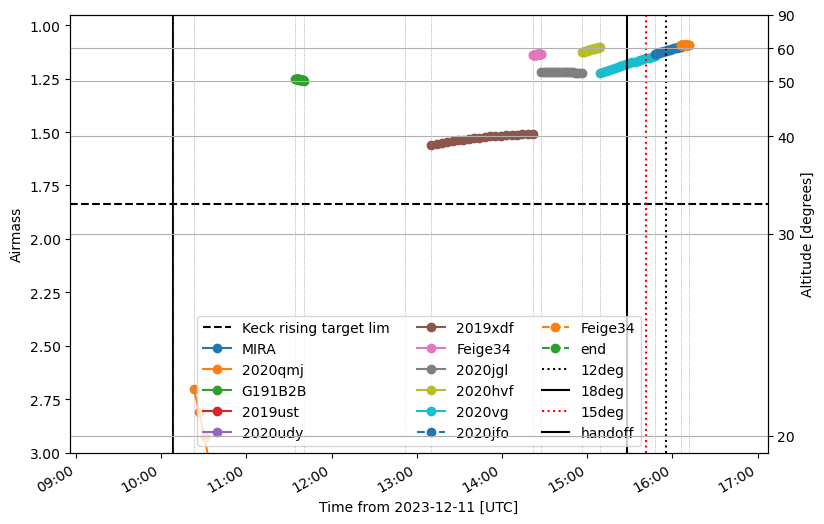

In [35]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')

# HIRE

In [36]:
sn2020qmj = astroplan.FixedTarget(coord=SkyCoord('00:44:06.01', '+05:15:35.9', unit=(u.hourangle, u.degree)),
                                  name='2020qmj')
at2020zoq = astroplan.FixedTarget(coord=SkyCoord('10:36:21.54', '+13:43:08.9', unit=(u.hourangle, u.degree)),
                                  name='2020zoq')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
at2016blu = astroplan.FixedTarget(coord=SkyCoord('12:35:52.16', '+27:55:56.0', unit=(u.hourangle, u.degree)),
                                  name='2016blu')
sn2020uem = astroplan.FixedTarget(coord=SkyCoord('08:24:23.850', '-03:29:19.10', unit=(u.hourangle, u.degree)),
                                  name='2020uem')

In [37]:
targets = [sn2020uxz, sn2020qmj, at2020zoq, at2016blu, sn2020uem]

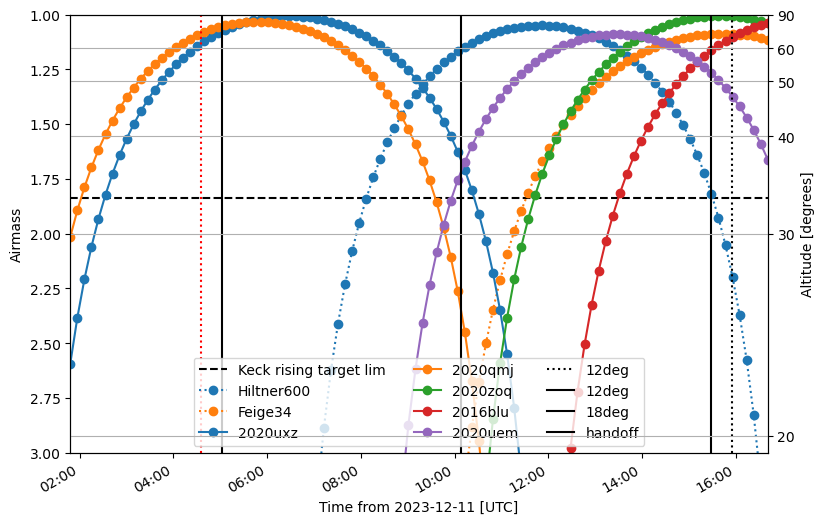

In [38]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.3, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility_HIRES.pdf')

In [39]:
at2020zoq = astroplan.FixedTarget(coord=SkyCoord('10:36:21.54', '+13:43:08.9', unit=(u.hourangle, u.degree)),
                                  name='2020zoq')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
at2016blu = astroplan.FixedTarget(coord=SkyCoord('12:35:52.16', '+27:55:56.0', unit=(u.hourangle, u.degree)),
                                  name='2016blu')
sn2020uem = astroplan.FixedTarget(coord=SkyCoord('08:24:23.850', '-03:29:19.10', unit=(u.hourangle, u.degree)),
                                  name='2020uem')
Feige11   = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

In [40]:
tab = """MIRA 00:00:00 -89:00:00 99 1x600
2020qmj 00:44:06.01  +05:15:35.9 19 3x1200
Feige11 01:04:21.6   +04:13:37   12 1x60
2020uxz 01:24:06.87  +12:55:17.3 15 2x900 
G191B2B 05:05:30.60  +52:49:54.0 11.9 1x60
2020uem 08:24:23.85  -03:29:19.1 16.8 3x900
2020zoq 10:36:21.54  +13:43:08.9 17 3x900
Feige34 10:39:36.74  +43:06:09.3 11.3 1x60
2020hvf 11:21:26.45  +03:00:52.8 17 3x900
2016blu 12:35:52.16  +27:55:56.0 16.9 3x900
end     00:00:00     -90:00:00.  99 1x1 """
#2020jfo 12:21:50.48  +04:28:54.1 18 2x300
#2020uxz 01:24:06.87  +12:55:17.3 16 2x100
#HD19445 03:08:25.86  +26:20:05.7 7.8 1x10
#HD84937 09:48:56.09  +13:44:39.3 8.3 1x10
#2020jgl 09:28:58.43  -14:48:19.8 19 1x600
#2019eez 06:16:22.26  -21:21:35.7 23 3x1200
#2020jfo 12:21:50.48  +04:28:54.1 18 1x300
#2020hvf 11:21:26.45  +03:00:52.8 17 1x150
#2020uxz 01:24:06.87  +12:55:17.3 15 1x100
#placehold 04:00:54.33  +18:00:10.2 19.5 1x900
#2020tkx 18:40:09.00  +34:06:59.5 19.5 1x900
#PG0205134  02:08:03.44  +13:36:30.9 14.87  1x120
#2020cxd 17:26:29.26  +71:05:38.6  20  1x900
#end       23:19:58.39  -05:09:55.8  11.83  1x1
#2020nxt  22:37:36.24  +35:00:07.7  21.2   1x1250
#placehold  00:00:00  00:00:00   22        2x1250
#2019iex  23:51:03.61  +20:08:43.7  21.3   1x1250
#gd71     05:52:27.51  +15:53:16.6  13.03  1x90
#HZ4      03:55:21.7   +09:47:18    14.52 1x120
#HD19445  03:08:25.86  +26:20:05.7  7.8   1x10
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019hnl 23:43:10.24  -02:56:58.7  23     4x1200
#2019muj  02:26:18.55  -09:50:09.0  22     2x1200
#2019osl  04:38:54.33  +18:50:10.2  22.5   3x1200

In [41]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [42]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [43]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0
2020qmj,00:44:06.01,+05:15:35.9,19,3x1200,3.0,1200.0
Feige11,01:04:21.6,+04:13:37,12,1x60,1.0,60.0
2020uxz,01:24:06.87,+12:55:17.3,15,2x900,2.0,900.0
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0
2020uem,08:24:23.85,-03:29:19.1,16.8,3x900,3.0,900.0
2020zoq,10:36:21.54,+13:43:08.9,17,3x900,3.0,900.0
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0
2020hvf,11:21:26.45,+03:00:52.8,17,3x900,3.0,900.0


In [44]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [45]:
tbdata['start'] = obs_start[:-1]

In [46]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0,2023-12-11 10:08:00.000
2020qmj,00:44:06.01,+05:15:35.9,19,3x1200,3.0,1200.0,2023-12-11 10:23:00.000
Feige11,01:04:21.6,+04:13:37,12,1x60,1.0,60.0,2023-12-11 11:34:30.000
2020uxz,01:24:06.87,+12:55:17.3,15,2x900,2.0,900.0,2023-12-11 11:40:30.000
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0,2023-12-11 12:18:45.000
2020uem,08:24:23.85,-03:29:19.1,16.8,3x900,3.0,900.0,2023-12-11 12:24:45.000
2020zoq,10:36:21.54,+13:43:08.9,17,3x900,3.0,900.0,2023-12-11 13:21:15.000
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0,2023-12-11 14:17:45.000
2020hvf,11:21:26.45,+03:00:52.8,17,3x900,3.0,900.0,2023-12-11 14:23:45.000


In [47]:
tbdata.write('../plan_hires.txt', format='ascii.fixed_width', overwrite=True)

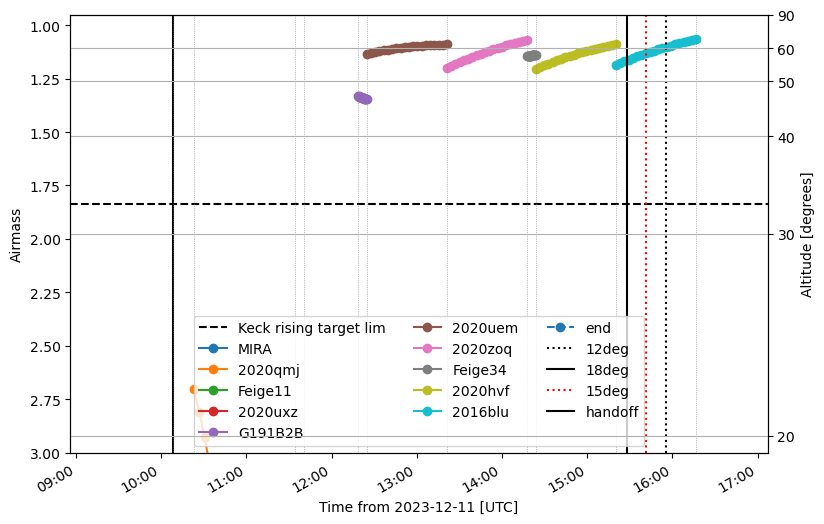

In [48]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_hires.pdf')